<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Data_Cleaning_in_Machine_Learning_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df0 = pd.read_csv("/content/Titanic Dataset.csv")
df0.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [6]:
#Checking for  duplicates
df0.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [7]:
#Checking data information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
#Checking for categorical and numerical columns
for col in df0.columns:
  if (df0[col].dtype) == "object":
    print(col + " is categorical")
  elif (df0[col].dtype) != "object":
    print(col + " is numerical")

PassengerId is numerical
Survived is numerical
Pclass is numerical
Name is categorical
Sex is categorical
Age is numerical
SibSp is numerical
Parch is numerical
Ticket is categorical
Fare is numerical
Cabin is categorical
Embarked is categorical


In [20]:
#We group the columns into their dtypes(numerical and categorical)
categorical_columns = [col for col in df0.columns if df0[col].dtype == "object"]
numerical_columns = [col for col in df0.columns if df0[col].dtype != "object"]
print(f"categorical columns : {categorical_columns}")
print(f"numerical columns: {numerical_columns}")


categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [26]:
#Let us now check the total number of unique values in categorical column
print(df0[categorical_columns].nunique())
print(df0[numerical_columns].nunique())

Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64
PassengerId    418
Survived         2
Pclass           3
Age             79
SibSp            7
Parch            8
Fare           169
dtype: int64


In [31]:
df0["Ticket"].unique()[:50]

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671'],
      dtype=object)

#We are dropping the “Name” and “Ticket” columns since they will have no effects on the final outcomes


In [34]:
df1 = df0.drop(columns = ["Name", "Ticket"])
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,NaN,S
414,1306,1,1,female,39.0,0,0,108.9000,C105,C
415,1307,0,3,male,38.5,0,0,7.2500,NaN,S
416,1308,0,3,male,NaN,0,0,8.0500,NaN,S


#Handling Missing Data

In [43]:
#Missing Values by percentage
(df1.isnull().sum()/df1.shape[0] * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

As we can see from the above result that Cabin has 78.22% null values and Age has 20.57% and fare has 0.23% of null values.

So, it is not a good idea to fill 77% of null values. So, we will drop the Cabin column. Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column.

In [54]:
df2 = df1.drop(columns=["Cabin"])
(df2.isnull().sum()/df2.shape[0] * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Embarked        0.000000
dtype: float64

In [65]:
df21 = df2.copy()
#df21
df4 = df21.copy()
#df4
(df4.isnull().sum()/df4.shape[0] * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Embarked        0.000000
dtype: float64

In [72]:
df4.dropna(subset=['Fare'], axis=0, inplace=True)
df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,NaN,0,0,8.0500,S


In [73]:
(df4.isnull().sum()/df4.shape[0] * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            20.623501
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

#Filling the age column with mean imputation

We can use Mean imputation or Median imputations for the case.

Note that;

Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
Median imputation is preferable when the data contains outliers or is skewed.





In [76]:
df5 = df4.fillna(df4.Age.mean())
df5

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.500000,0,0,7.8292,Q
1,893,1,3,female,47.000000,1,0,7.0000,S
2,894,0,2,male,62.000000,0,0,9.6875,Q
3,895,0,3,male,27.000000,0,0,8.6625,S
4,896,1,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30.181269,0,0,8.0500,S
414,1306,1,1,female,39.000000,0,0,108.9000,C
415,1307,0,3,male,38.500000,0,0,7.2500,S
416,1308,0,3,male,30.181269,0,0,8.0500,S


In the next step, we will be checking for outliers.  To check the outliers, We generally use a box plot. A box plot, also referred to as a box-and-whisker plot, is a graphical representation of a dataset’s distribution.

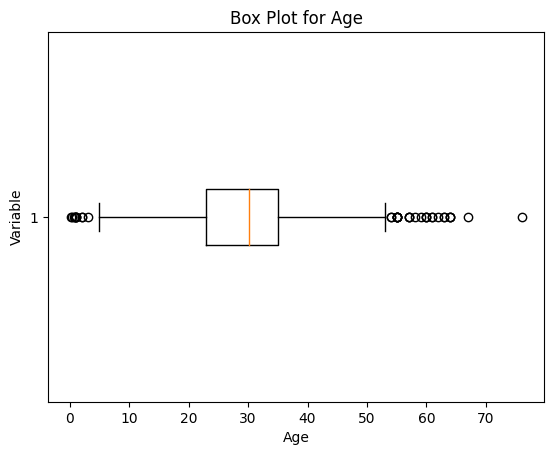

In [79]:
#Let’s plot the box plot for Age column data.
import matplotlib.pyplot as plt
plt.boxplot(df5['Age'], vert = False)
plt.xlabel("Age")
plt.ylabel("Variable")
plt.title("Box Plot for Age")
plt.show()

#From above, the values elow 5 and above 55 are outliers

In [80]:
#We drop the outliers
mean = df5['Age'].mean()
std = df5["Age"].std()
lower_bound = mean - (std*2)
upper_bound = mean + (std*2)
print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")

lower bound: 5.056606720828224
upper bound: 55.305931043522236


#The above shows the lower boundaries and the upper boundaries to which our data is normally distributed (without outliers)
  #We then proceed to remove the outliers.

In [82]:
df50 = df5.copy()
df51 = df50[(df50["Age"]>=lower_bound) & (df50["Age"]<=upper_bound)]
df51

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.500000,0,0,7.8292,Q
1,893,1,3,female,47.000000,1,0,7.0000,S
3,895,0,3,male,27.000000,0,0,8.6625,S
4,896,1,3,female,22.000000,1,1,12.2875,S
5,897,0,3,male,14.000000,0,0,9.2250,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30.181269,0,0,8.0500,S
414,1306,1,1,female,39.000000,0,0,108.9000,C
415,1307,0,3,male,38.500000,0,0,7.2500,S
416,1308,0,3,male,30.181269,0,0,8.0500,S


#Data validation and verification
  #Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge.

  #For the machine learning prediction, First, we separate independent and target features. Here we will consider only ‘Sex’ ‘Age’ ‘SibSp’, ‘Parch’ ‘Fare’ ‘Embarked’ only as the independent features and Survived as target variables. Because PassengerId will not affect the survival rate.

In [83]:
X = df51[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
y = df51['Survived']

0      0
1      1
3      0
4      1
5      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 387, dtype: int64

Data formatting

Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

Scaling

Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale.
Particularly useful when features have different scales, and certain algorithms are sensitive to the magnitude of the features.
Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).
Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [87]:
#Example
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
#We can however only applyy this to numerical column
numerical_column_in_X = [col for col in X.columns if X[col].dtype != "object"]
#numerical_column_in_X
X11 = X
X11

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
5,3,male,14.000000,0,0,9.2250,S
...,...,...,...,...,...,...,...
413,3,male,30.181269,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,30.181269,0,0,8.0500,S


In [90]:
#numerical_column_in_X
X11[numerical_column_in_X] = scaler.fit_transform(X11[numerical_column_in_X])
X11.head()

<ipython-input-90-a421b7161daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X11[numerical_column_in_X] = scaler.fit_transform(X11[numerical_column_in_X])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.581633,0.000,0.000000,0.029769,Q
1,1.0,female,0.836735,0.125,0.000000,0.026616,S
3,1.0,male,0.428571,0.000,0.000000,0.032937,S
4,1.0,female,0.326531,0.125,0.111111,0.046721,S
5,1.0,male,0.163265,0.000,0.000000,0.035076,S
